In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Load training data
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(['Id'], axis=1)
train_data['pawpularity_norm']= train_data['Pawpularity']/100.0
train_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,pawpularity_norm
0,0,1,1,1,0,0,1,0,0,0,0,0,63,0.63
1,0,1,1,0,0,0,0,0,0,0,0,0,42,0.42
2,0,1,1,1,0,0,0,0,1,1,0,0,28,0.28
3,0,1,1,1,0,0,0,0,0,0,0,0,15,0.15
4,0,0,0,1,0,0,1,0,0,0,0,0,72,0.72


In [69]:
X = train_data.drop('Pawpularity', axis=1).drop('pawpularity_norm', axis = 1) #except the last and the first(Id)
y = train_data['pawpularity_norm']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-11-b327ac5c07bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


count    6343.000000
mean        0.378843
std         0.202708
min         0.010000
25%         0.250000
50%         0.330000
75%         0.460000
max         1.000000
Name: pawpularity_norm, dtype: float64


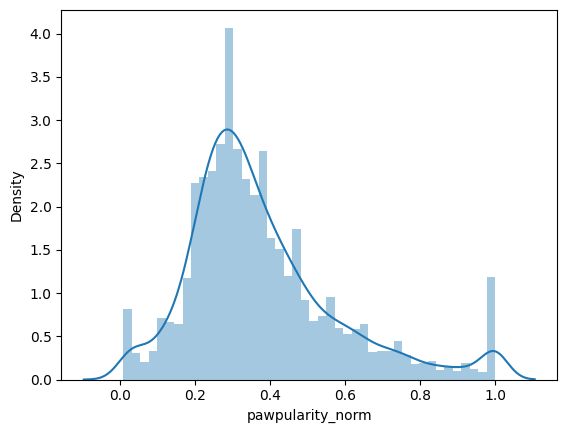

In [11]:
# Analyse the distribution of the target variable
output_summary = y_train.describe()
sns.distplot(y_train)
print(output_summary)


<ipython-input-13-e7875607cb8a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier_free_y)


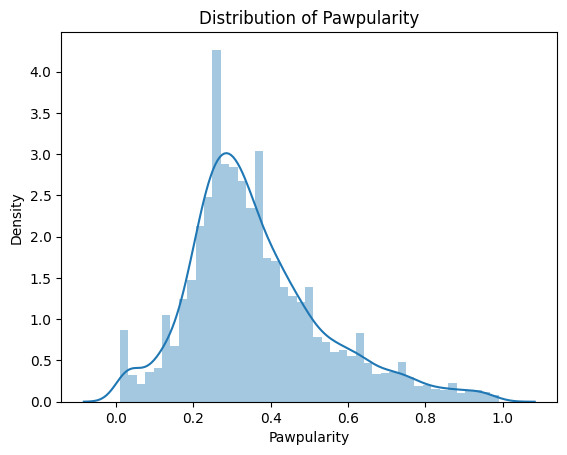

count    6181.000000
mean        0.362563
std         0.178294
min         0.010000
25%         0.250000
50%         0.330000
75%         0.450000
max         0.990000
Name: pawpularity_norm, dtype: float64


In [13]:
# Get the distribution of pawpularity for the outlier free data
outlier_free_y = y_train[y_train<1.0]
outlier_free_x = X_train[y_train<1.0]

sns.distplot(outlier_free_y)
plt.title('Distribution of Pawpularity')
plt.xlabel('Pawpularity')
plt.ylabel('Density')
plt.show()

# Analyse the distribution of the target variable
output_summary = outlier_free_y.describe()
print(output_summary)


<ipython-input-15-0dafcc6cb0ec>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(of_multiclass)


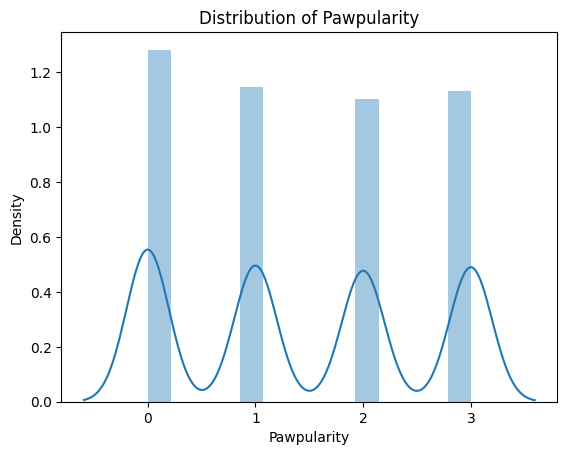

In [15]:
# Divide the data into a multiclassification problem by splitting the target variable into 4 bins accoriding to the quartiles
outlier_free_y.quantile([0.25, 0.5, 0.75]).values
of_multiclass = pd.qcut(outlier_free_y, q=[0, 0.25, 0.5, 0.75, 1.0], labels=['0', '1', '2', '3'])
# Plot the distribution of the target variable
sns.distplot(of_multiclass)
plt.title('Distribution of Pawpularity')
plt.xlabel('Pawpularity')
plt.ylabel('Density')
plt.show()

In [18]:
# Get the names of the columns and exclude the target variable
cols = train_data.columns
cols = cols.drop('Pawpularity').drop('pawpularity_norm')
cols

Index(['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

<ipython-input-19-94ef6e8f52b3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)


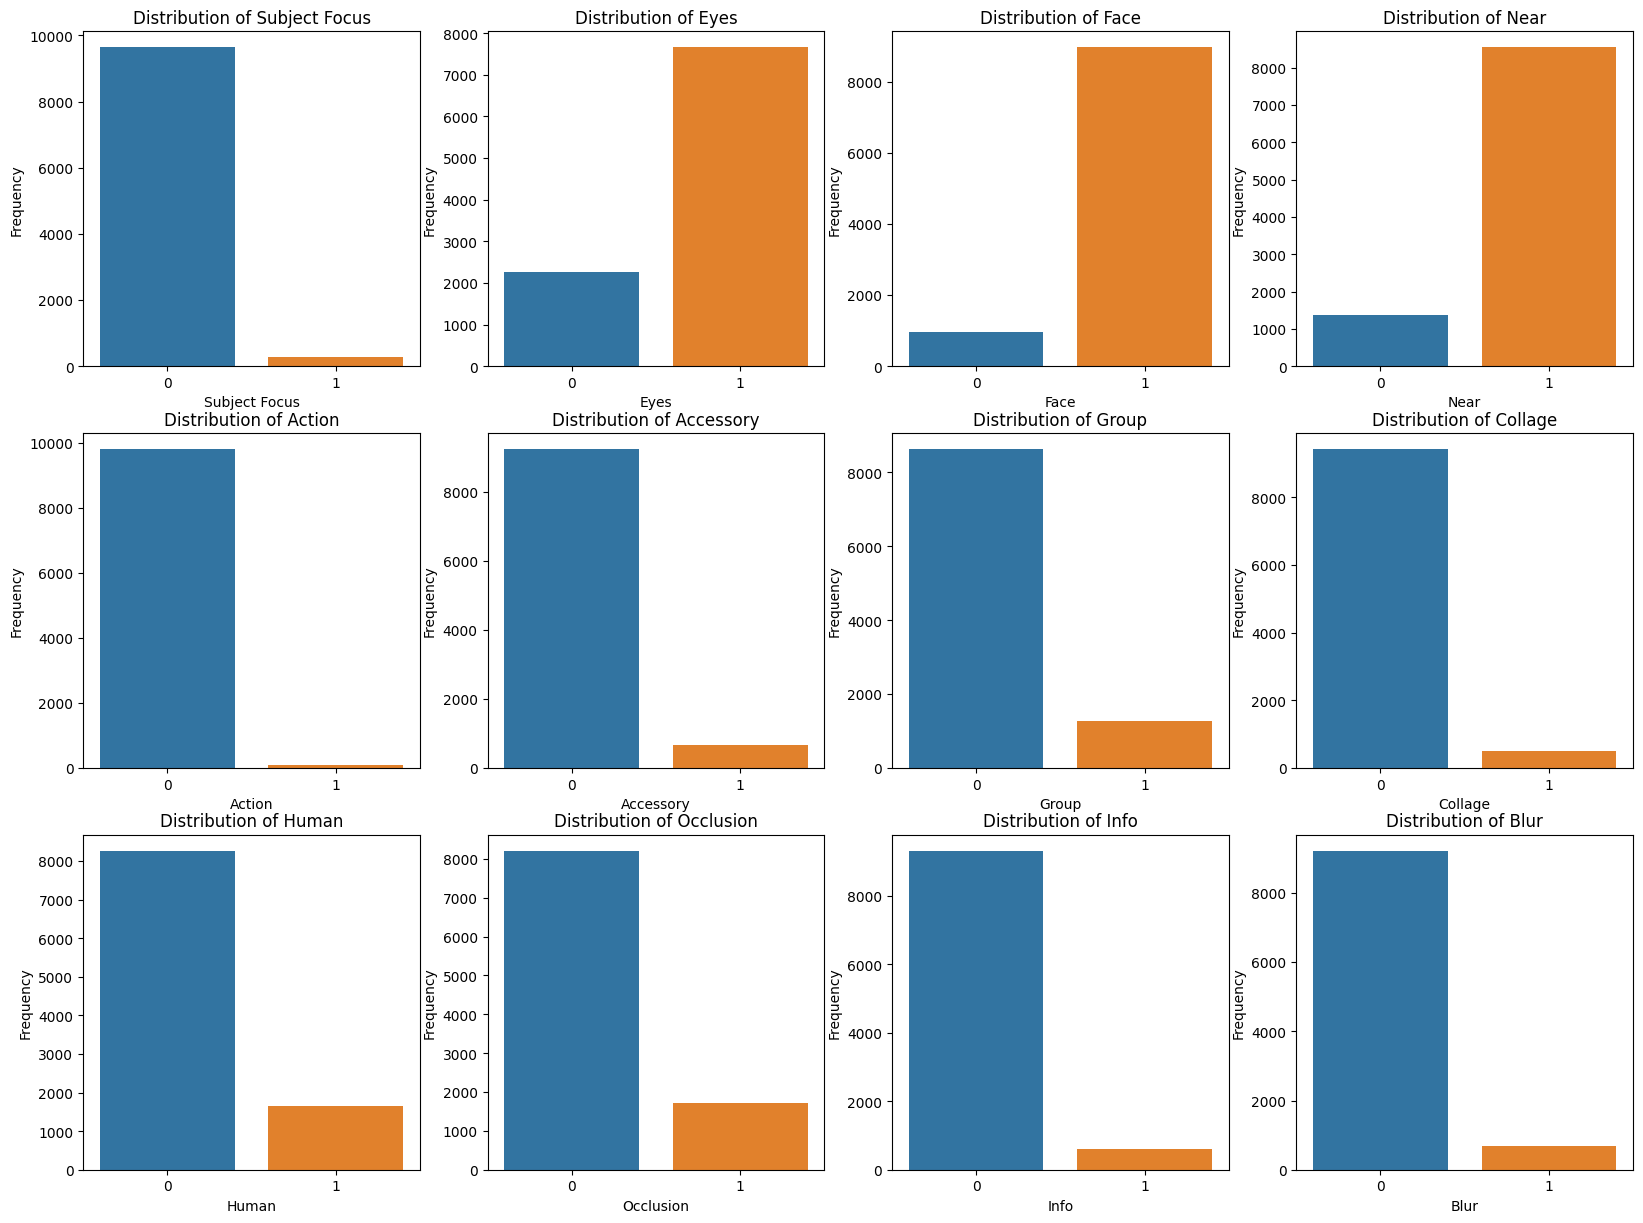

In [19]:
# Plot the distribution of each feature in a subplot
plt.subplots(figsize=(20, 20))
for i, feature in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=train_data[feature], data=train_data)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

<ipython-input-22-86c1fbd1a866>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)


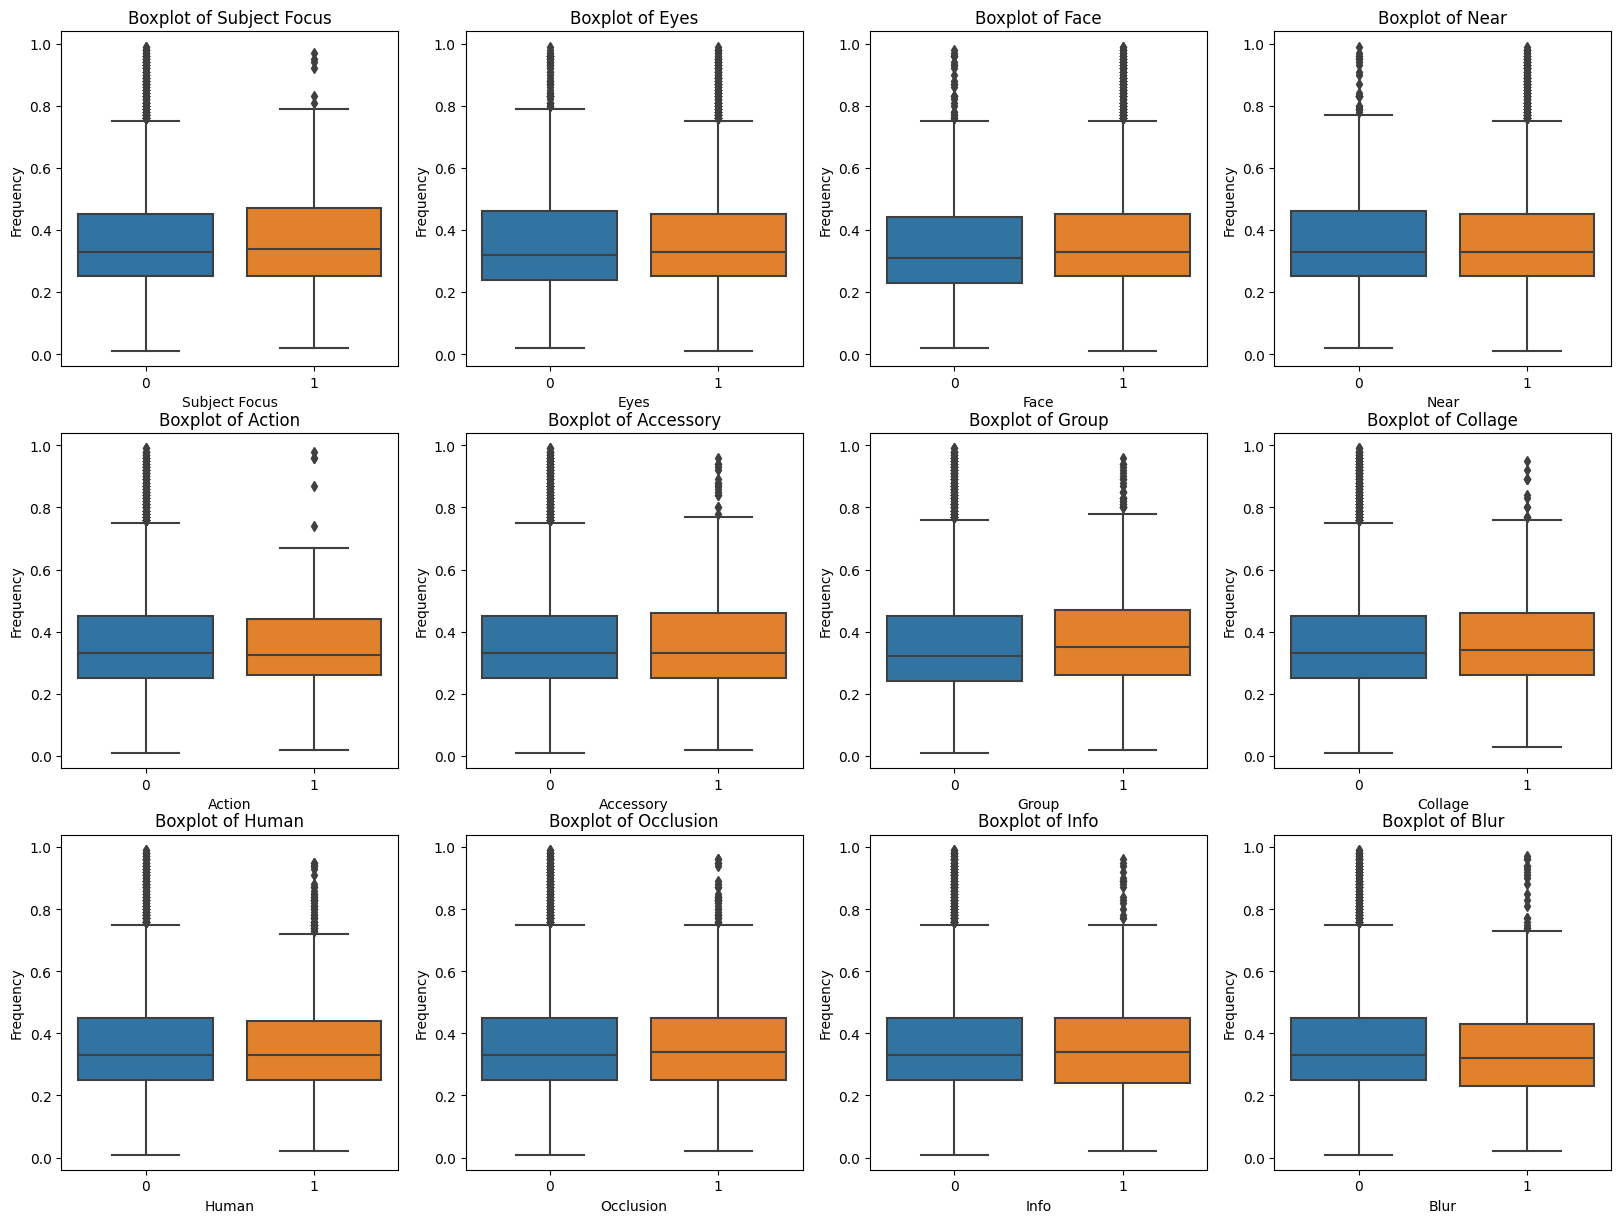

In [22]:
# Plot the distribution of each feature in a subplot
plt.subplots(figsize=(20, 20))
for i, feature in enumerate(cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=outlier_free_x[feature], y = outlier_free_y)

    plt.title('Boxplot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

<ipython-input-25-b81e4985817e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, i + 1)


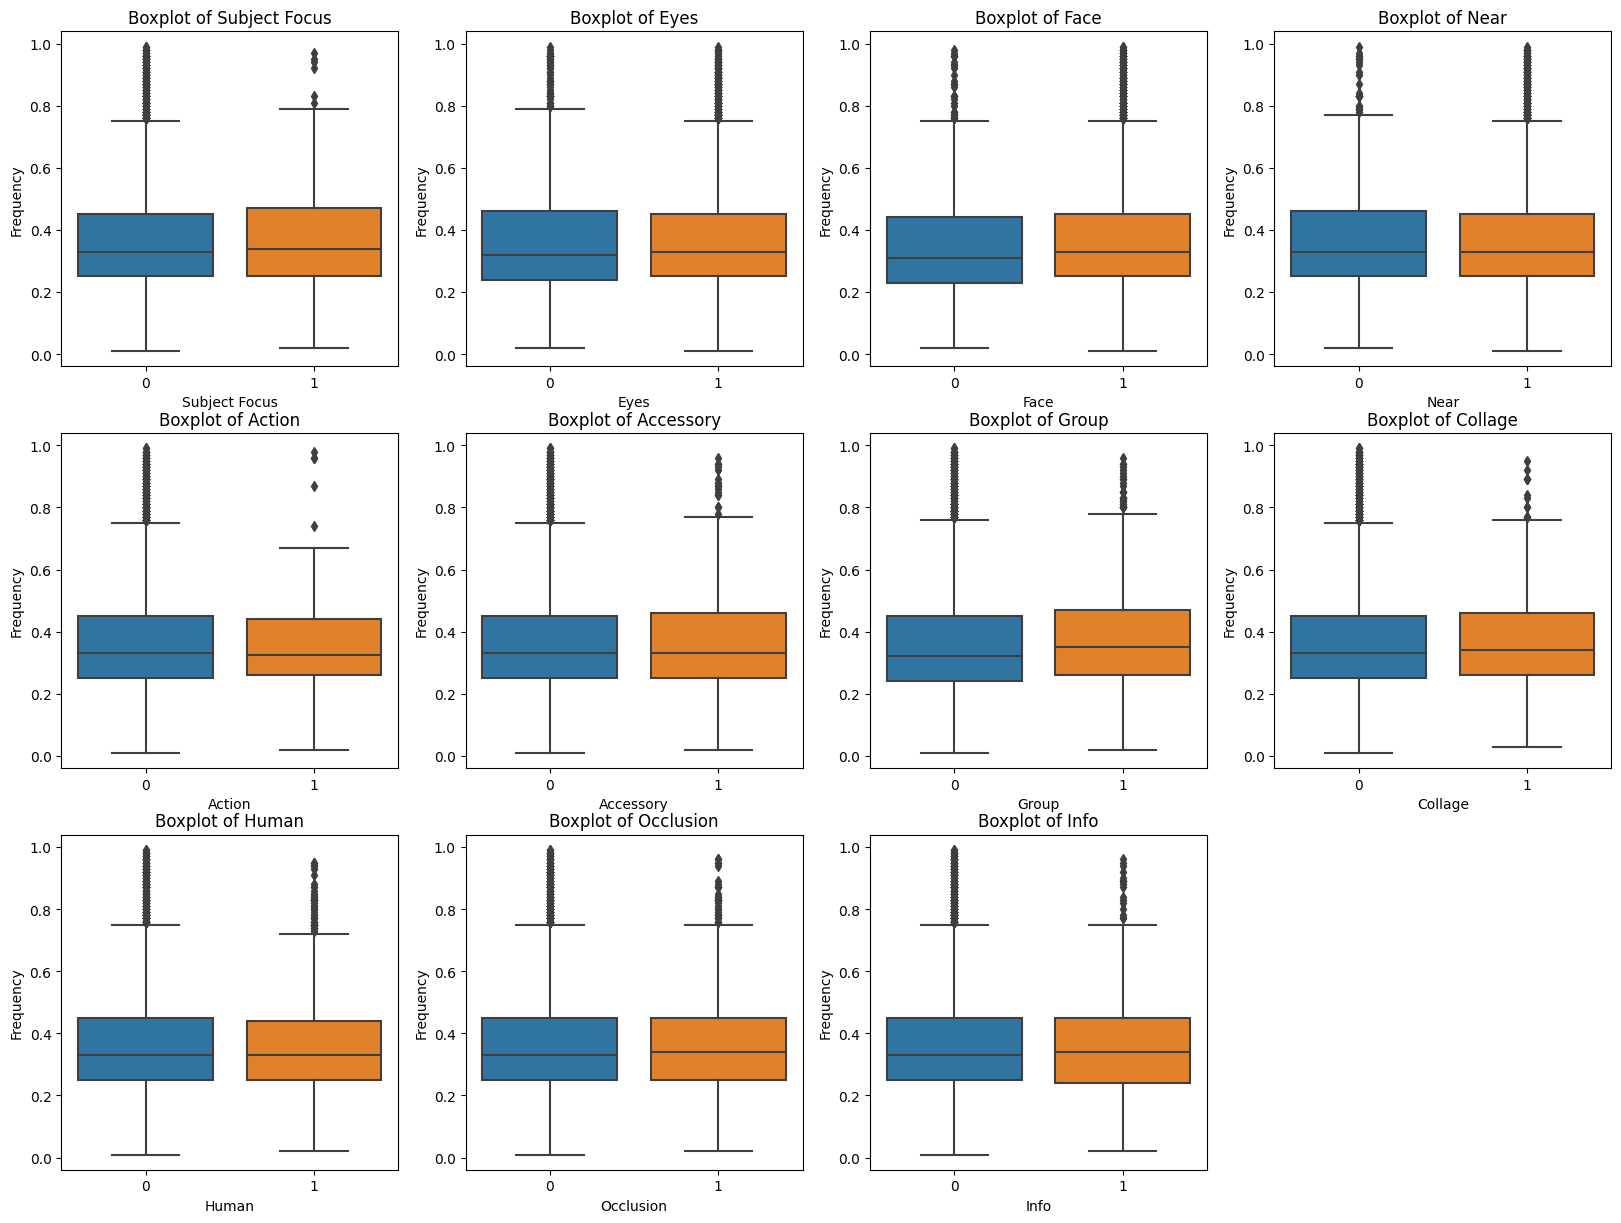

In [25]:
# Plot the distribution of each feature in a subplot
plt.subplots(figsize=(20, 20))
for i, feature in enumerate(cols[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=outlier_free_x[feature], y = outlier_free_y)

    plt.title('Boxplot of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

In [26]:
## Trying association rule mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Convert the categorical variables to numerical
# Binarize the Pawpularity variable, making zero the values below the mean and one the values above the 75th percentile
bin_train_data = train_data.copy().drop(['pawpularity_norm'], axis=1)
bin_train_data['Pawpularity'] = np.where(bin_train_data['Pawpularity'] >= 36, 1, 0)


assoc_data = pd.get_dummies(bin_train_data)

# Get the frequent itemsets
frequent_itemsets = apriori(assoc_data, min_support=0.01, use_colnames=True)
#frequent_itemsets.head()

# Get the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
#print(rules.head())

rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
# Show the rules that have the Pawpularity variable in the consequent and sort them by confidence and lift
sorted_rules = rules[rules['consequents'].astype(str).str.contains('Pawpularity')].sort_values(['confidence', 'lift'], ascending=[False, False])
sorted_rules.head(10)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
941,"(Occlusion, Info, Face)",(Pawpularity),0.020178,0.441889,0.011098,0.550000,1.244658,0.002181,1.240248,0.200614
400,"(Info, Occlusion)",(Pawpularity),0.021186,0.441889,0.011602,0.547619,1.239269,0.002240,1.233720,0.197252
383,"(Occlusion, Group)",(Pawpularity),0.022700,0.441889,0.012107,0.533333,1.206941,0.002076,1.195953,0.175441
946,"(Info, Occlusion)","(Pawpularity, Face)",0.021186,0.401130,0.011098,0.523810,1.305835,0.002599,1.257627,0.239276
380,"(Near, Info)",(Pawpularity),0.040658,0.441889,0.020581,0.506203,1.145545,0.002615,1.130246,0.132438
903,"(Near, Info, Face)",(Pawpularity),0.037631,0.441889,0.018866,0.501340,1.134540,0.002237,1.119223,0.123223
1179,"(Near, Info, Eyes, Face)",(Pawpularity),0.033697,0.441889,0.016646,0.494012,1.117956,0.001756,1.103013,0.109190
1181,"(Near, Info, Eyes)","(Pawpularity, Face)",0.033797,0.401130,0.016646,0.492537,1.227875,0.003089,1.180126,0.192076
793,"(Near, Info, Eyes)",(Pawpularity),0.033797,0.441889,0.016646,0.492537,1.114619,0.001712,1.099808,0.106429
358,"(Collage, Near)",(Pawpularity),0.023002,0.441889,0.011199,0.486842,1.101730,0.001034,1.087602,0.094511


From this analysisi, we can see that the variable combinations that influence our pawpularity the most are (Near, info), (Face, Info, Near), (Face, Accessory, Near), (Face, Accessory) and (Face, Collage, Eyes)

In [28]:
# get the antecedents of the top ten sorted rules and show the frequency of each antecedent
top_ten = sorted_rules.head(10)
top_ten_antecedents = top_ten['antecedents'].astype(str)
top_ten_antecedents = top_ten_antecedents.str.replace('frozenset', '')
top_ten_antecedents = top_ten_antecedents.str.replace('(', '')
top_ten_antecedents = top_ten_antecedents.str.replace(')', '')
top_ten_antecedents = top_ten_antecedents.str.replace('{', '')
top_ten_antecedents = top_ten_antecedents.str.replace('}', '')
top_ten_antecedents = top_ten_antecedents.str.replace("'", '')
top_ten_antecedents = top_ten_antecedents.str.replace(" ", '')
top_ten_antecedents = top_ten_antecedents.str.split(',')
top_ten_antecedents = top_ten_antecedents.explode()
top_ten_antecedents = top_ten_antecedents.value_counts()
top_ten_antecedents = top_ten_antecedents.reset_index()
top_ten_antecedents.columns = ['Feature', 'Frequency']
top_ten_antecedents


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-7556c77bd7de>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_ten_antecedents = top_ten_antecedents.str.replace('(', '')
<ipython-input-28-7556c77bd7de>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_ten_antecedents = top_ten_antecedents.str.replace(')', '')
<ipython-input-28-7556c77bd7de>:7: Future

,Feature,Frequency
0,Info,8
1,Near,6
2,Occlusion,4
3,Face,3
4,Eyes,3
5,Group,1
6,Collage,1


In [31]:
len(top_ten_antecedents)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coefficients: 
 [0.00227569]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


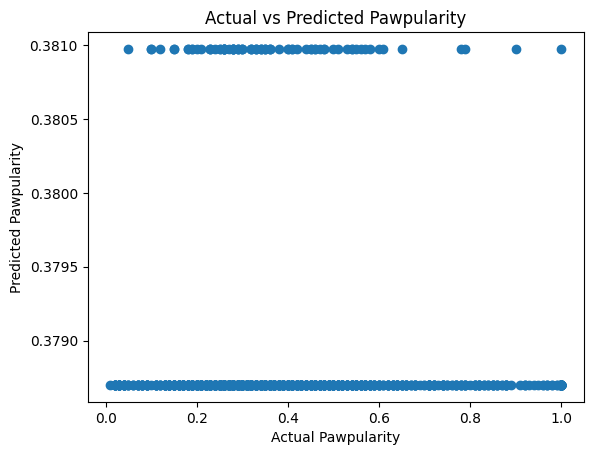

Coefficients: 
 [ 0.00203853 -0.00103481]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


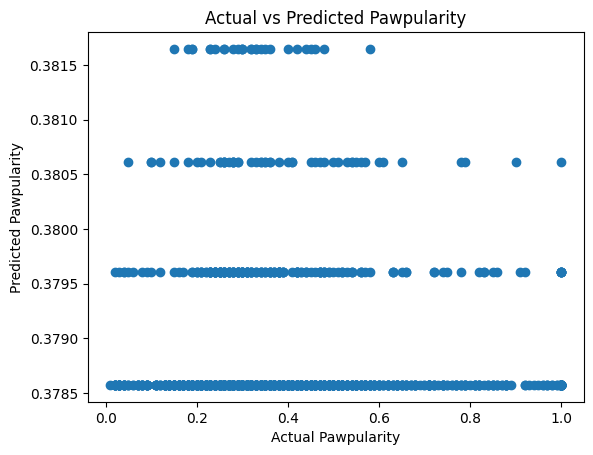

Coefficients: 
 [ 0.00165572 -0.00106181  0.00216574]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


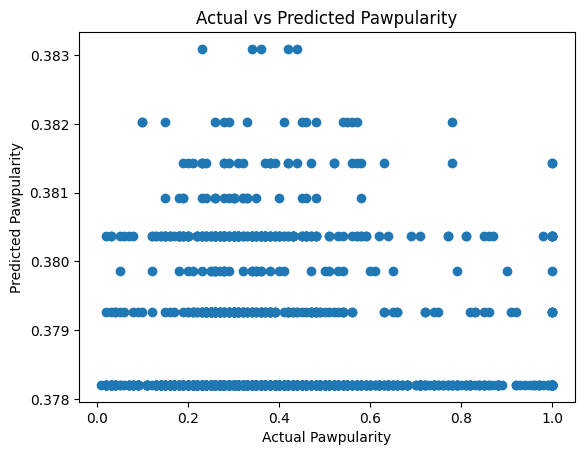

Coefficients: 
 [ 0.00120376 -0.00198892  0.00210562  0.00718603]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


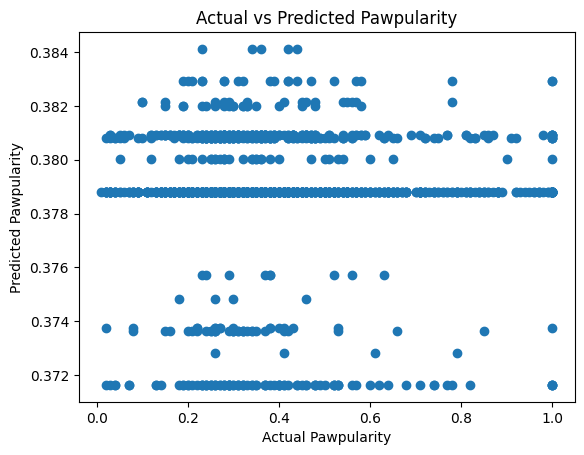

Coefficients: 
 [ 0.00182002 -0.00142079  0.0021871   0.01479414 -0.00920982]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


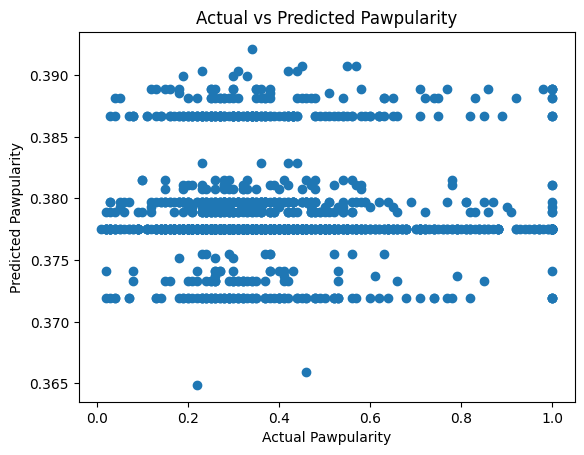

Coefficients: 
 [ 0.00116691  0.00373193  0.00215876  0.01606275 -0.0091595   0.01718732]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


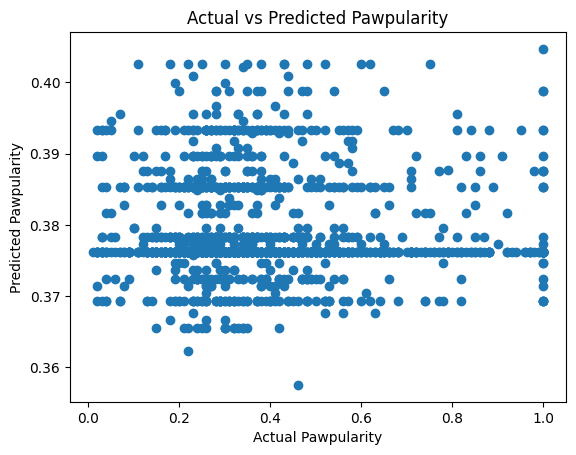

Coefficients: 
 [-0.00231783  0.00475888  0.00216808  0.01577428 -0.00937661  0.01689817
  0.00881793]
Root Mean squared error: 0.21
Coefficient of determination: -0.00


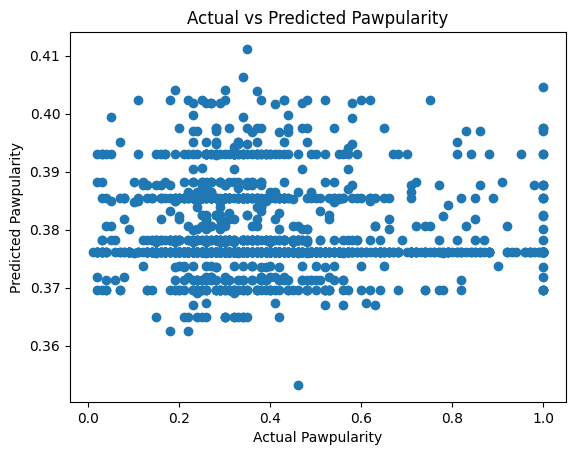

In [35]:
# Train a regression model using the top five antecedents and the Pawpularity variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

rmse = []
r2 = []
models = []
for i in range(len(top_ten_antecedents)):
  # Get the top five antecedents
  top_five = top_ten_antecedents.head(i+1)
  top_five = top_five['Feature']
  top_five = top_five.tolist()

  # Get the training data
  X_train_i = X_train[top_five]
  X_val_i = X_val[top_five]

  # Train the model
  model = LinearRegression()
  model.fit(X_train_i, y_train)

  # Make predictions
  y_pred = model.predict(X_val_i)

  # Get the model performance metrics
  print('Coefficients: \n', model.coef_)
  print('Root Mean squared error: %.2f' % mean_squared_error(y_val, y_pred)**0.5)
  print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

  rmse.append(mean_squared_error(y_val, y_pred)**0.5)
  r2.append(r2_score(y_val, y_pred))
  models.append(model)

  # Plot the predictions against the actual values
  plt.scatter(y_val, y_pred)
  plt.xlabel('Actual Pawpularity')
  plt.ylabel('Predicted Pawpularity')
  plt.title('Actual vs Predicted Pawpularity')
  plt.show()



In [37]:
# Get the best model and number of features
# Print the results of the best model
best_model_idx = np.argmin(rmse)
print(f"N features: {range(1, len(top_ten_antecedents) +1)[best_model_idx]}")
print(f"Best model: {models[best_model_idx].coef_}")
print(f"Best rmse: {rmse[best_model_idx]}")
print(f"Best r2: {r2[best_model_idx]}")


N features: 4
Best model: [ 0.00120376 -0.00198892  0.00210562  0.00718603]
Best rmse: 0.21309654053594446
Best r2: -0.0012582060017594099


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coefficients: 
 [-0.0025409]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


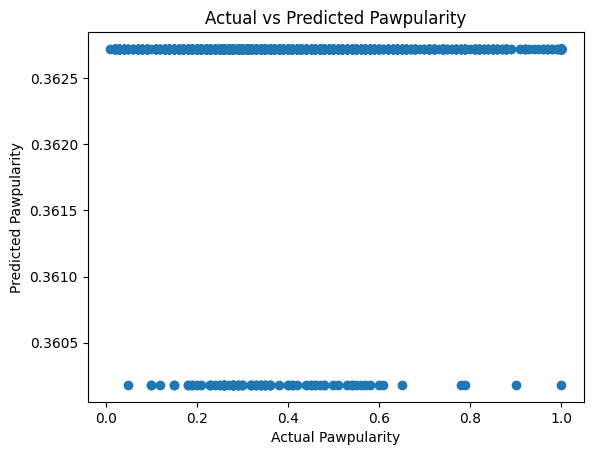

Coefficients: 
 [-0.00395146 -0.00606693]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


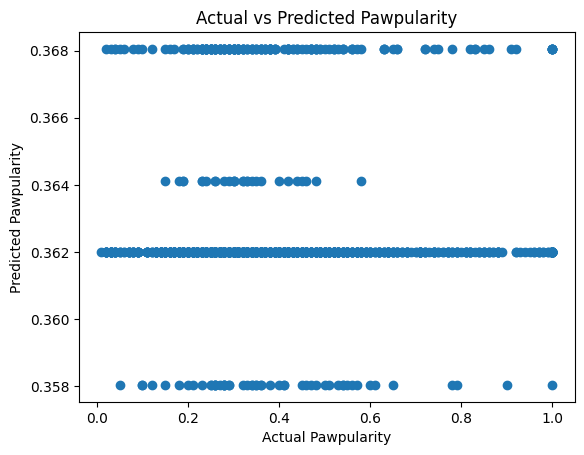

Coefficients: 
 [-0.00443684 -0.00610121  0.00268504]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


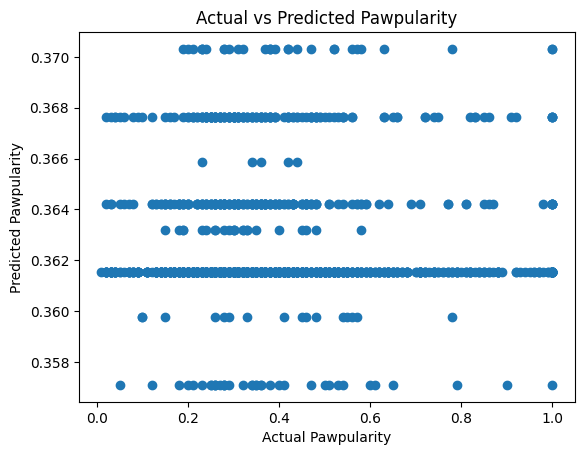

Coefficients: 
 [-0.00508576 -0.00736475  0.00260323  0.00979487]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


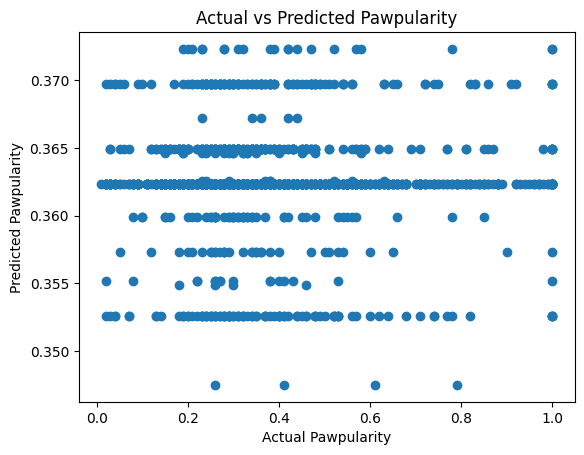

Coefficients: 
 [-0.00473222 -0.00703739  0.00264286  0.01415972 -0.00528343]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


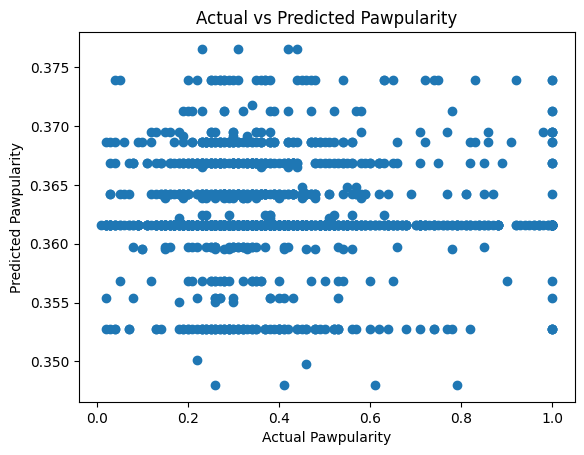

Coefficients: 
 [-0.00538082 -0.00159848  0.00260192  0.01543688 -0.00518683  0.01798432]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


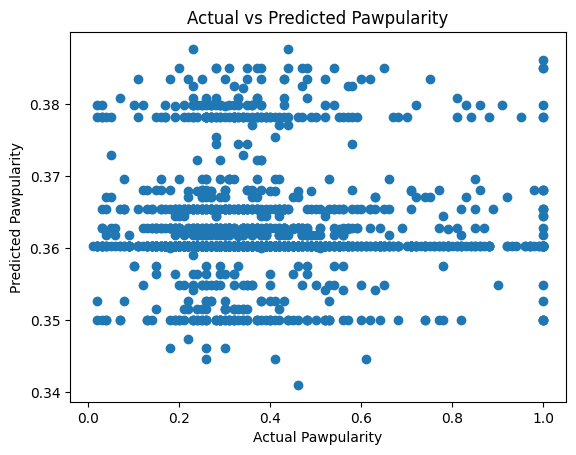

Coefficients: 
 [-0.00811065 -0.00079589  0.00259723  0.01522287 -0.00536835  0.01777872
  0.00683485]
Root Mean squared error: 0.21
Coefficient of determination: -0.01


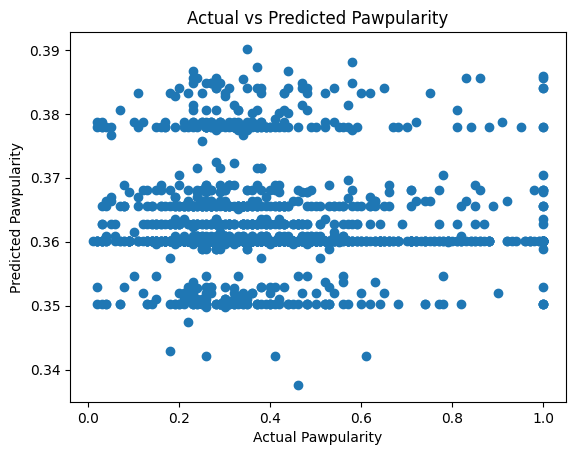

In [40]:
rmse = []
r2 = []
models = []
for i in range(len(top_ten_antecedents)):
  # Get the top five antecedents
  top_five = top_ten_antecedents.head(i+1)
  top_five = top_five['Feature']
  top_five = top_five.tolist()

  # Get the training data
  X_train_i = outlier_free_x[top_five]
  X_val_i = X_val[top_five]

  # Train the model
  model = LinearRegression()
  model.fit(X_train_i, outlier_free_y)

  # Make predictions
  y_pred = model.predict(X_val_i)

  # Get the model performance metrics
  print('Coefficients: \n', model.coef_)
  print('Root Mean squared error: %.2f' % mean_squared_error(y_val, y_pred)**0.5)
  print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

  rmse.append(mean_squared_error(y_val, y_pred)**0.5)
  r2.append(r2_score(y_val, y_pred))
  models.append(model)

  # Plot the predictions against the actual values
  plt.scatter(y_val, y_pred)
  plt.xlabel('Actual Pawpularity')
  plt.ylabel('Predicted Pawpularity')
  plt.title('Actual vs Predicted Pawpularity')
  plt.show()

In [41]:
# Get the best model and number of features
# Print the results of the best model
best_model_idx = np.argmin(rmse)
print(f"N features: {range(1, len(top_ten_antecedents) +1)[best_model_idx]}")
print(f"Best model: {models[best_model_idx].coef_}")
print(f"Best rmse: {rmse[best_model_idx]}")
print(f"Best r2: {r2[best_model_idx]}")

N features: 1
Best model: [-0.0025409]
Best rmse: 0.214281983818825
Best r2: -0.012429070018205035


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
#Test both models on the test set

#Get the best models for both datasets
top_five = top_ten_antecedents.head(4)
top_five = top_five['Feature']
top_five = top_five.tolist()

# Get the training data
X_train_i = X_train[top_five]

# Train the model
model = LinearRegression()
model.fit(X_train_i, y_train)

# Make predictions
y_pred = model.predict(X_test[top_five])

# Get the model performance metrics
print('Coefficients: \n', model.coef_)
print('Root Mean squared error: %.6f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.6f' % r2_score(y_test, y_pred))


#################
# Outlier Free Dataset
top_five = top_ten_antecedents.head(1)
top_five = top_five['Feature']
top_five = top_five.tolist()

# Get the training data
X_train_i = outlier_free_x[top_five]

# Train the model
model = LinearRegression()
model.fit(X_train_i, outlier_free_y)

# Make predictions
y_pred = model.predict(X_test[top_five])

# Get the model performance metrics
print('Coefficients: \n', model.coef_)
print('Root Mean squared error: %.6f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.6f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.00120376 -0.00198892  0.00210562  0.00718603]
Root Mean squared error: 0.210281
Coefficient of determination: -0.000325
Coefficients: 
 [-0.0025409]
Root Mean squared error: 0.211003
Coefficient of determination: -0.007210


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Try a SVR model

In [78]:
## Use a  svr model to predict the target variable
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_dt_train = pd.concat([X_train, X_val], ignore_index = True)
y_dt_train = pd.concat([y_train, y_val], ignore_index = True)
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVR(), param_grid, cv=5, verbose=3)
grid.fit(X_dt_train, y_dt_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Get the model performance metrics
print('Root Mean squared error: %.5f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.5f' % r2_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.021 total time=   6.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   2.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.018 total time=   1.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.029 total time=   1.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   2.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.016 total time=   2.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.015 total time=   2.8s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.006 total time=   2.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.030 total time=   1.8s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.028 total time=   1.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.016 total time=   1.7s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;,

In [80]:
# Get the model performance metrics
print('Root Mean squared error: %.5f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.5f' % r2_score(y_test, y_pred))

Root Mean squared error: 0.21196
Coefficient of determination: -0.01638


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
best_aparams, best_estimator

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


({'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}, SVR(C=10, gamma=0.0001))

In [46]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Root Mean squared error: %.2f' % mean_squared_error(y_val, y_pred)**0.5)
print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean squared error: 0.22
Coefficient of determination: -0.03


In [82]:
X_dt_train = pd.concat([outlier_free_x, X_val[y_val<1.0]], ignore_index = True)
y_dt_train = pd.concat([outlier_free_y, y_val[y_val <1.0]], ignore_index = True)
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.0001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVR(), param_grid, cv=5, verbose=3)
grid.fit(X_dt_train, y_dt_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Get the model performance metrics
print('Root Mean squared error: %.5f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.5f' % r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   3.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   2.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   1.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.022 total time=   1.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.011 total time=   1.5s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.004 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.006 total time=   1.3s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.003 total time=   2.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.018 total time=   1.9s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.009 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;,

In [49]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Root Mean squared error: %.2f' % mean_squared_error(y_val, y_pred)**0.5)
print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean squared error: 0.22
Coefficient of determination: -0.03


In [50]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.005 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.009 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.005 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.005 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.002 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

({'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=10))

In [51]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Root Mean squared error: %.2f' % mean_squared_error(y_val, y_pred)**0.5)
print('Coefficient of determination: %.2f' % r2_score(y_val, y_pred))

Root Mean squared error: 0.21
Coefficient of determination: -0.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Create a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(outlier_free_x, outlier_free_y)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

best_params, best_estimator


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.004 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.003 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.011 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.004 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.003 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

({'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 2},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=8))

In [54]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Root Mean squared error: %.6f' % mean_squared_error(y_val, y_pred)**0.5)
print('Coefficient of determination: %.6f' % r2_score(y_val, y_pred))

Root Mean squared error: 0.214533
Coefficient of determination: -0.014806


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


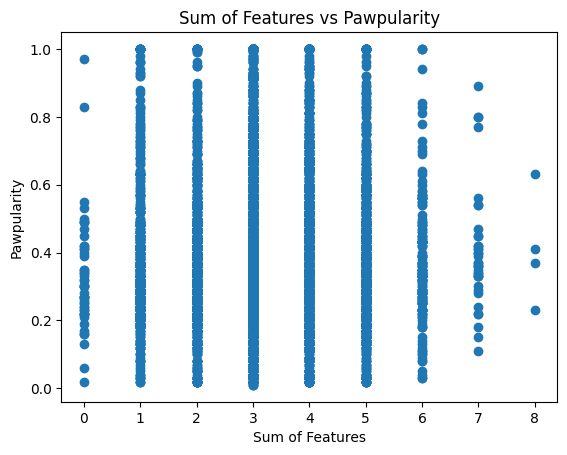

In [ ]:
# Create a feature that is the sum of all the other features and use a bisserial correlation to see if there is a relationship between the new feature and the target variable

if 'sum' in X_train.columns:
    X_train = X_train.drop(['sum'], axis=1)
# Get the sum of all the features
X_train['sum'] = X_train.sum(axis=1)

# Get the correlation between the new feature and the target variable using Pearson's correlation
corr = X_train['sum'].corr(y_train, method='pearson')

# Plot the new feature against the target variable
plt.scatter(X_train['sum'], y_train)
plt.xlabel('Sum of Features')
plt.ylabel('Pawpularity')
plt.title('Sum of Features vs Pawpularity')
plt.show()


In [ ]:
# Get the bissieral correlation between all the binary features and the target variable

# Get the binary features
bin_train_data = X_train.copy()

from scipy.stats import pointbiserialr

# Get the correlation between the binary features and the target variable
corr_list = []
for feature in bin_train_data.columns:
    # Append the column name to the corr object
    corr = pointbiserialr(bin_train_data[feature], y_train)
    corr_list.append((corr, feature))

# Get the correlation values
corr_list

[(SignificanceResult(statistic=-0.006873259850662688, pvalue=0.540577658033581),
  'Subject Focus'),
 (SignificanceResult(statistic=-0.0019758577016287925, pvalue=0.8603626468075752),
  'Eyes'),
 (SignificanceResult(statistic=0.012982353110208853, pvalue=0.2477305696714798),
  'Face'),
 (SignificanceResult(statistic=0.0022473012625435565, pvalue=0.8414184119113994),
  'Near'),
 (SignificanceResult(statistic=0.0018828236386479477, pvalue=0.8668746678311112),
  'Action'),
 (SignificanceResult(statistic=0.01882000870711994, pvalue=0.09379489433768222),
  'Accessory'),
 (SignificanceResult(statistic=0.017735477164355536, pvalue=0.11430634022892946),
  'Group'),
 (SignificanceResult(statistic=0.00548459842115827, pvalue=0.6253356825307141),
  'Collage'),
 (SignificanceResult(statistic=0.0008954854142115669, pvalue=0.9364552736197383),
  'Human'),
 (SignificanceResult(statistic=-0.0009555533921339985, pvalue=0.9322027258617633),
  'Occlusion'),
 (SignificanceResult(statistic=-0.0023064466490

| Variable    | Statistic   | P-value     | Significant |
|-------------|-------------|-------------|-------------|
| Subject Focus | -0.00687  | 0.5406    | No          |
| Eyes        | -0.00198  | 0.8604    | No          |
| Face        | 0.01298   | 0.2477    | No          |
| Near        | 0.00225   | 0.8414    | No          |
| Action      | 0.00188   | 0.8669    | No          |
| Accessory   | 0.01882   | 0.09379   | No          |
| Group       | 0.01774   | 0.1143    | No          |
| Collage     | 0.00548   | 0.6253    | No          |
| Human       | 0.00090   | 0.9365    | No          |
| Occlusion   | -0.00096  | 0.9322    | No          |
| Info        | -0.00231  | 0.8373    | No          |
| Blur        | -0.02089  | 0.06288   | Yes         |
| sum         | 0.00766   | 0.4952    | No          |


# Decision tree Regressor

In [74]:
# Train a model using the new feature in a Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(pd.concat([X_train, X_val], ignore_index=True), pd.concat([y_train, y_val], ignore_index = True))

# Get the best parameters
best_params_dt = grid.best_params_

# Get the best estimator
best_estimator_dt = grid.best_estimator_
best_params_dt, best_estimator_dt

# Test Metrics
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_dt.predict(X_test)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.003 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.003 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.001 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.003 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

In [75]:
X_dt_train = pd.concat([outlier_free_x, X_val[y_val<1.0]], ignore_index = True)
y_dt_train = pd.concat([outlier_free_y, y_val[y_val <1.0]], ignore_index = True)
# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_dt_train, y_dt_train)

# Get the best parameters
best_params_dt = grid.best_params_

# Get the best estimator
best_estimator_dt = grid.best_estimator_
best_params_dt, best_estimator_dt

# Test Metrics
# Use the best estimator model to make predictions on the validation set
y_pred = best_estimator_dt.predict(X_test)

# Print the metrics of the best estimator model
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.007 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.003 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=0.000 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.002 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.007 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_l

# Light GBM

In [56]:
# Use a LightGBM model to predict the target variable
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define the parameters
params = {
    'objective': 'regression',  # Use 'regression' for regression problems
    'metric': 'rmse',           # Use 'rmse' for root mean squared error
    'boosting_type': 'gbdt',
    'num_leaves': 15,
    'learning_rate': 0.001,
    'verbose': 2
}

# Train the model
model = lgb.train(params, train_data, valid_sets=test_data, num_boost_round=1000)

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Get the model performance metrics
print('Mean squared error: %.6f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.6f' % r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.897735
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.897735
[LightGBM] [Debug] init for col-wise cost 0.002163 seconds, init for row-wise cost 0.000722 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 6343, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.378843
[LightGBM] [Debug] Trained a tree with leaves = 15 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 15 and depth = 6
[Lig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


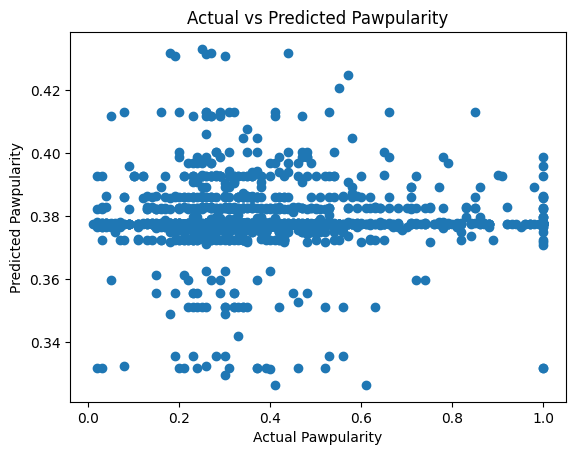

In [57]:
# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

In [58]:
# Use a LightGBM model to predict the target variable
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


# Create the LightGBM dataset
train_data = lgb.Dataset(outlier_free_x, label=outlier_free_y)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define the parameters
params = {
    'objective': 'regression',  # Use 'regression' for regression problems
    'metric': 'rmse',           # Use 'rmse' for root mean squared error
    'boosting_type': 'gbdt',
    'num_leaves': 15,
    'learning_rate': 0.001,
    'verbose': 2
}

# Train the model
model = lgb.train(params, train_data, valid_sets=test_data, num_boost_round=1000)

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Get the model performance metrics
print('Mean squared error: %.6f' % mean_squared_error(y_test, y_pred)**0.5)
print('Coefficient of determination: %.6f' % r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.897778
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.897778
[LightGBM] [Debug] init for col-wise cost 0.001149 seconds, init for row-wise cost 0.003285 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 6181, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.362563
[LightGBM] [Debug] Trained a tree with leaves = 15 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 15 and depth = 8
[Lig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


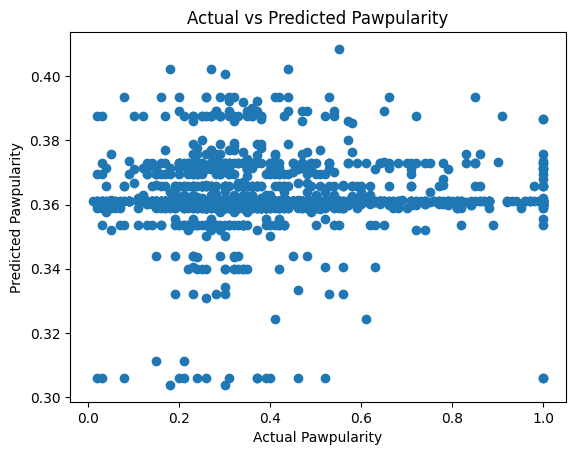

In [59]:
# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()